# SEASONAL ARIMA APPLIED TO FASHION RETAIL 

In this wotk, we have analysed  data from fashion sales from 4 years in one category.
The objective is sales forecasting for the following years.
To achieve this goal, we have used Sarima Model as fashion sales is known to have an stationary performance.
The steps followed were:
1. Import data already filtered and grouped by month
2. Visualize data
3. Analize stationarity with Addfuller test
4. Analize Autocorrelation and Partial Autocorrelation to see stationarity and seasonality
5. Diferentiation
6. Apply SARIMA model
7. Comparing results between the chosen parameters
8. Forecasting with new model



## 1. Import Data

In [12]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [15]:
df=pd.read_csv('sales-textiles3.csv')

In [16]:
df.head()

,Date,Sales
0,1997-01-01,16475
1,1997-02-01,26996
2,1997-03-01,41323
3,1997-04-01,31550
4,1997-05-01,8226


In [17]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1997-01-01,16475
1,1997-02-01,26996
2,1997-03-01,41323
3,1997-04-01,31550
4,1997-05-01,8226


In [18]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [19]:
df.head()

,Month,Sales
0,1997-01-01,16475
1,1997-02-01,26996
2,1997-03-01,41323
3,1997-04-01,31550
4,1997-05-01,8226


In [20]:
df.set_index('Month',inplace=True)

In [21]:
df.head()

,Sales
Month,
1997-01-01,16475
1997-02-01,26996
1997-03-01,41323
1997-04-01,31550
1997-05-01,8226


## 2. Visualize the Data

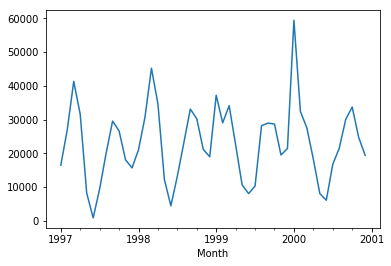

In [24]:
df['Sales'].plot()

In [26]:
# Here we divide data into train and test parts
# The test part will be the last year 
y_train=df[:36]
y_test=df[36:]


In [ ]:
# We can observe that date is Seasonal, as it responds to a fashion sector performance.

### Auto Regressive Model
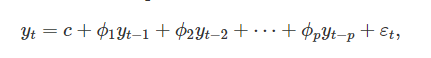

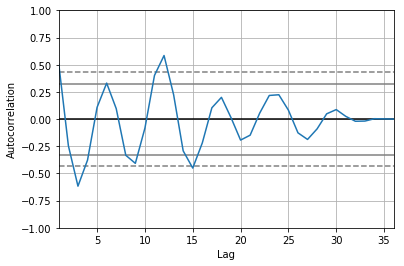

In [28]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(y_train['Sales'])
plt.show()

In [ ]:
#The example above shows positive first-order autocorrelation, where first order indicates that observations that are one apart are correlated, and positive means that the correlation between the observations is positive. 
#As the points appear in a smooth snake-like curve, it means the correlation is positive 

## 3. Analize stationarity

In [27]:
test_result=adfuller(y_train['Sales'])
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

adfuller_test(y_train['Sales'])

ADF Test Statistic : -4.19604101801485
p-value : 0.000669141717223674
#Lags Used : 7
Number of Observations Used : 28
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
#The Adfuller test tell us that it is stationary to, so we don't need to differenciate

## 4. Analize Autocorrelation and Partial Autocorrelation


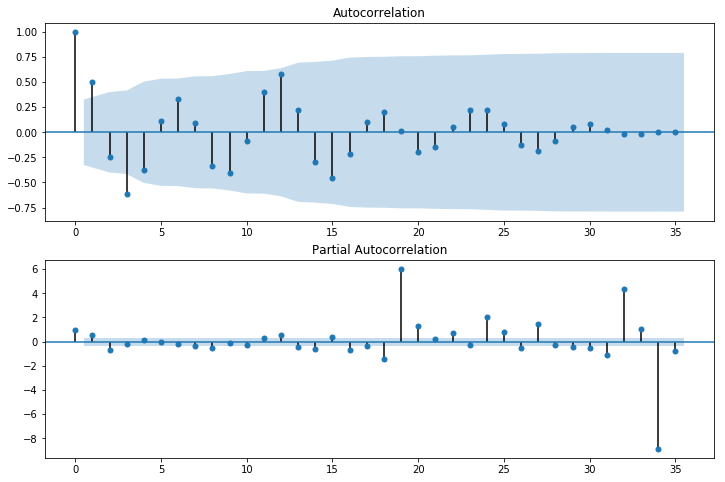

In [29]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(y_train['Sales'],lags=35,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(y_train['Sales'],lags=35,ax=ax2)

In [ ]:
#With AFC we can visualize seasonality  at first year. We can see the asesonl patron better in the following image

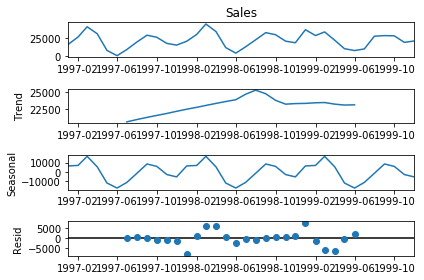

In [30]:
ts_decomp=sm.tsa.seasonal_decompose(y_train['Sales'],model='additive')
ts_decomp.plot()
plt.show()

## 5. Differentiation

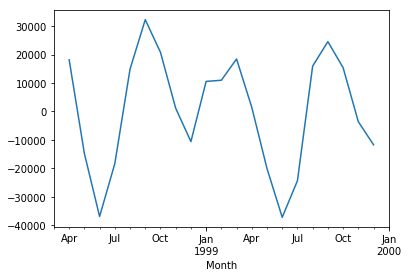

In [31]:
y_train['Seasonal First Difference']=y_train['Sales']-y_train['Sales'].shift(15)
y_train['Seasonal First Difference'].plot()
#As we know that there is seasonality, we have firts shift 12. But As we have seen there is no stationarity with this differentiation, we have then shift 3 more (15)

In [ ]:
#We have performed adfuller test until having stationarity

In [32]:
test_result=adfuller(y_train['Seasonal First Difference'].iloc[15:])
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

adfuller_test(y_train['Seasonal First Difference'].iloc[15:])

ADF Test Statistic : -6.351479265416526
p-value : 2.604405490424686e-08
#Lags Used : 1
Number of Observations Used : 19
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


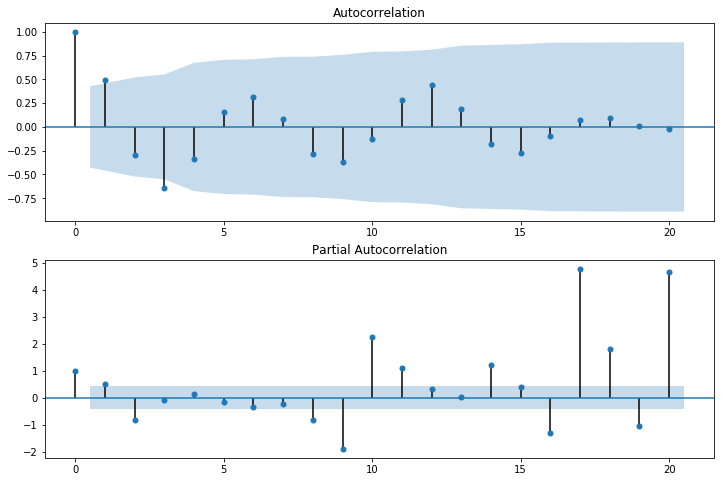

In [33]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(y_train['Seasonal First Difference'].iloc[15:],lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(y_train['Seasonal First Difference'].iloc[15:],lags=20,ax=ax2)

In [ ]:
#We can not conclude something with the graphics,
#We will perform iterations so we will wee best parameters for SARIMA

## 6. Applying SARIMA model

In [34]:
 y_train.index = pd.DatetimeIndex(y_train.index.values,
                               freq=y_train.index.inferred_freq)

In [ ]:
#We have performed iterations with 1, 2 and 3 number of pdq. Here I leave the iteration with number 1

In [36]:

import itertools

p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q)) ]
print(seasonal_pdq)
print ('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX:{}X{}'.format(pdq[0],seasonal_pdq[0]))


[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]
Examples of parameter combinations for Seasonal ARIMA...
SARIMAX:(0, 0, 0)X(0, 0, 0, 12)


In [37]:
metric_aic_dict=dict()
for pm in pdq:
    for pm_seasonal in seasonal_pdq:
        try:
            model=sm.tsa.statespace.SARIMAX(y_train['Sales'],
                                          order=pm,
                                          seasonal_order=pm_seasonal,
                                          enforce_stationarity=False,
                                          enforce_invertibility=False
                                           )
            model_fit=model.fit()        
            print('SARIMA{}X{}12 - AIC:{}'.format(pm,pm_seasonal,model_fit.aic))
            metric_aic_dict.update({(pm,pm_seasonal):model_fit.bic})
        except:
            continue

SARIMA(0, 0, 0)X(0, 0, 0, 12)12 - AIC:810.3107683340173
SARIMA(0, 0, 0)X(0, 0, 1, 12)12 - AIC:512.5318568681995
SARIMA(0, 0, 0)X(0, 1, 0, 12)12 - AIC:465.20083573684155
SARIMA(0, 0, 0)X(0, 1, 1, 12)12 - AIC:220.92269922440235
SARIMA(0, 0, 0)X(1, 0, 0, 12)12 - AIC:486.90354702832656
SARIMA(0, 0, 0)X(1, 0, 1, 12)12 - AIC:478.0942465724045
SARIMA(0, 0, 0)X(1, 1, 0, 12)12 - AIC:250.99144098582636
SARIMA(0, 0, 0)X(1, 1, 1, 12)12 - AIC:222.47824164007164
SARIMA(0, 0, 1)X(0, 0, 0, 12)12 - AIC:760.2162374052343
SARIMA(0, 0, 1)X(0, 0, 1, 12)12 - AIC:471.742008614918
SARIMA(0, 0, 1)X(0, 1, 0, 12)12 - AIC:444.3094989817134
SARIMA(0, 0, 1)X(0, 1, 1, 12)12 - AIC:203.57371601301926
SARIMA(0, 0, 1)X(1, 0, 0, 12)12 - AIC:550.986052580633
SARIMA(0, 0, 1)X(1, 0, 1, 12)12 - AIC:487.7711520891767
SARIMA(0, 0, 1)X(1, 1, 0, 12)12 - AIC:251.80191286749474
SARIMA(0, 0, 1)X(1, 1, 1, 12)12 - AIC:205.3034218803646
SARIMA(0, 1, 0)X(0, 0, 0, 12)12 - AIC:728.2092083597857
SARIMA(0, 1, 0)X(0, 0, 1, 12)12 - AIC:459.2

In [ ]:
# The warnings means basically, the covariates are so big that the model has a pretty hard time trying to fit coefficients for the linear regression and everything else gets messed up.
# https://stats.stackexchange.com/questions/340054/scaling-control-time-series-with-causalimpact
    

In [38]:
{k: v for k,v in sorted(metric_aic_dict.items(),key=lambda x: x[1])}

{((0, 1, 1), (0, 1, 1, 12)): 183.94408195173997,
 ((1, 1, 1), (1, 1, 1, 12)): 186.70033134934735,
 ((1, 1, 1), (0, 1, 1, 12)): 187.12231736829045,
 ((0, 1, 1), (1, 1, 1, 12)): 187.51522622117716,
 ((0, 1, 0), (0, 1, 1, 12)): 203.38236801063823,
 ((0, 0, 1), (0, 1, 1, 12)): 204.4814712920014,
 ((0, 1, 0), (1, 1, 1, 12)): 206.34387472632966,
 ((1, 1, 0), (0, 1, 1, 12)): 206.46244287100657,
 ((0, 0, 1), (1, 1, 1, 12)): 206.51376225234077,
 ((1, 0, 1), (0, 1, 1, 12)): 206.7763067809881,
 ((1, 1, 0), (1, 1, 1, 12)): 208.62294417342406,
 ((1, 0, 1), (1, 1, 1, 12)): 208.79526675314906,
 ((1, 1, 1), (1, 1, 0, 12)): 210.4434955530297,
 ((1, 1, 0), (1, 1, 0, 12)): 211.150005391241,
 ((0, 0, 0), (0, 1, 1, 12)): 221.71848976999908,
 ((1, 0, 0), (0, 1, 1, 12)): 223.5401146122859,
 ((0, 0, 0), (1, 1, 1, 12)): 223.67192745846677,
 ((1, 0, 0), (1, 1, 1, 12)): 225.53554918097808,
 ((1, 0, 0), (1, 1, 0, 12)): 226.02202314094794,
 ((1, 0, 1), (1, 1, 0, 12)): 228.18139518906997,
 ((0, 1, 1), (1, 1, 0, 12)

In [ ]:
# We will compare models that better fit with pdq until 1, 2 and 3 

In [43]:
model=sm.tsa.statespace.SARIMAX(y_train['Sales'],order=(0,1,1),seasonal_order=(0,1,1,12))
model_fit1=model.fit()
model_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   36
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -232.841
Date:                            Sun, 20 Dec 2020   AIC                            471.681
Time:                                    18:19:06   BIC                            475.088
Sample:                                01-01-1997   HQIC                           472.538
                                     - 12-01-1999                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4063      0.178     -2.286      0.022      -0.754      -0.058
ma.S.L12      -0.2952      0.200     -1.476      0.140      -0.687       0.097
sigma2      4.368e+07   1.33e-09   3.28e+16      0.000    4.37e+07    4.37e+07
===================================================================================
Ljung-Box (Q):                        9.74   Jarque-Bera (JB):                 0.54
Prob(Q):                              0.99   Prob(JB):                         0.76
Heteroskedasticity (H):               1.92   Skew:                            -0.37
Prob(H) (two-sided):                  0.38   Kurtosis:                         2.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.32e+32. Standard errors may be unstable.
"""

In [39]:
model=sm.tsa.statespace.SARIMAX(y_train['Sales'],order=(0,0,2),seasonal_order=(0,2,0,12))
model_fit2=model.fit()
model_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Sales   No. Observations:                   36
Model:             SARIMAX(0, 0, 2)x(0, 2, [], 12)   Log Likelihood                -124.712
Date:                             Sun, 20 Dec 2020   AIC                            255.425
Time:                                     18:18:40   BIC                            256.879
Sample:                                 01-01-1997   HQIC                           254.886
                                      - 12-01-1999                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2829      0.233      1.216      0.224      -0.173       0.739
ma.L2          0.0461      0.225      0.205      0.838      -0.394       0.487
sigma2      6.203e+07   5.55e-10   1.12e+17      0.000     6.2e+07     6.2e+07
===================================================================================
Ljung-Box (Q):                        8.29   Jarque-Bera (JB):                 1.58
Prob(Q):                              0.69   Prob(JB):                         0.45
Heteroskedasticity (H):               0.16   Skew:                             0.86
Prob(H) (two-sided):                  0.10   Kurtosis:                         3.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.39e+34. Standard errors may be unstable.
"""

In [41]:
model=sm.tsa.statespace.SARIMAX(y_train['Sales'],order=(0,3,3),seasonal_order=(0,2,0,12))
model_fit3=model.fit()
model_fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Sales   No. Observations:                   36
Model:             SARIMAX(0, 3, 3)x(0, 2, [], 12)   Log Likelihood                 -93.005
Date:                             Sun, 20 Dec 2020   AIC                            194.010
Time:                                     18:18:50   BIC                            194.799
Sample:                                 01-01-1997   HQIC                           192.308
                                      - 12-01-1999                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -2.1833      0.869     -2.511      0.012      -3.887      -0.479
ma.L2          1.4463      1.323      1.093      0.274      -1.147       4.040
ma.L3         -0.2382      0.646     -0.369      0.712      -1.503       1.027
sigma2      5.165e+07   4.87e-08   1.06e+15      0.000    5.16e+07    5.16e+07
===================================================================================
Ljung-Box (Q):                        3.70   Jarque-Bera (JB):                 0.49
Prob(Q):                              0.88   Prob(JB):                         0.78
Heteroskedasticity (H):               0.21   Skew:                            -0.31
Prob(H) (two-sided):                  0.23   Kurtosis:                         2.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.15e+31. Standard errors may be unstable.
"""

In [ ]:
#From the three Sarima models, we sse that the one that has the best performance is the thirds one. 
#This is logical because we have differentiated 3 lags

## 7. Comparing results

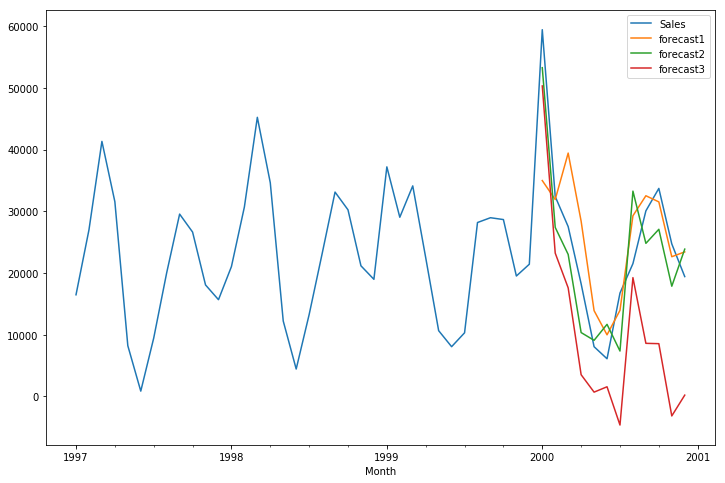

In [44]:
from datetime import datetime
df['forecast1']=model_fit1.predict(start=datetime(2000,1,1), end=datetime(2000,12,1),dynamic=True)
df['forecast2']=model_fit2.predict(start=datetime(2000,1,1), end=datetime(2000,12,1),dynamic=True)
df['forecast3']=model_fit3.predict(start=datetime(2000,1,1), end=datetime(2000,12,1),dynamic=True)
df[['Sales','forecast1','forecast2','forecast3']].plot(figsize=(12,8))

In [45]:
actual=y_test['Sales']['2000-01-01':]
forecast1=model_fit1.get_prediction(start=pd.to_datetime('2000-01-01'),end=pd.to_datetime('2000-12-01'),dynamic=False)
predictions1=forecast1.predicted_mean
rmse1=np.sqrt((predictions1 - actual)**2).mean()

forecast2=model_fit2.get_prediction(start=pd.to_datetime('2000-01-01'),end=pd.to_datetime('2000-12-01'),dynamic=False)
predictions2=forecast2.predicted_mean
rmse2=np.sqrt((predictions2 - actual)**2).mean()

forecast3=model_fit3.get_prediction(start=pd.to_datetime('2000-01-01'),end=pd.to_datetime('2000-12-01'),dynamic=False)
predictions3=forecast3.predicted_mean
rmse3=np.sqrt((predictions3 - actual)**2).mean()
print('Rmse1: {}'.format(rmse1))
print('Rmse2: {}'.format(rmse2))
print('Rmse3: {}'.format(rmse3))

Rmse1: 6495.958370396597
Rmse2: 6208.075242555135
Rmse3: 14346.355962425181


In [ ]:
#We can see that even aic is better for sarima model3, the one that fits best with the test part is the second model
# It is maybe because the testing year  doesn't have the same trend as the previous year

## 8. Forecasting with new model

In [46]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,12)]

In [47]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [48]:
future_df=pd.concat([df,future_datest_df])

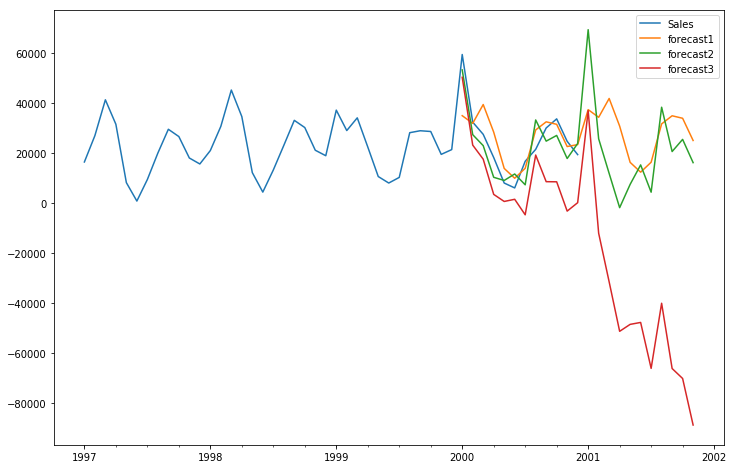

In [49]:
future_df['forecast1'] = model_fit1.predict(start = datetime(2000,1,1), end = datetime(2003,1,1), dynamic= True)  
future_df['forecast2'] = model_fit2.predict(start = datetime(2000,1,1), end = datetime(2003,1,1), dynamic= True)  
future_df['forecast3'] = model_fit3.predict(start = datetime(2000,1,1), end = datetime(2003,1,1), dynamic= True)  
future_df[['Sales', 'forecast1','forecast2','forecast3']].plot(figsize=(12, 8)) 

In [ ]:
#this graphic finally gives us a view in which we can see that model3 is not good at all. The ideal model would be a combination between the first and the second model
#the third model is bad, maybe because it is detecting a descending trend